# Hand Gestures Torch Conv2d

In [1]:
from pathlib import Path
import os
import shutil
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [22]:
HOME = os.getcwd()
ROOT = str(Path.home())
VID_DIR = os.path.join(HOME, 'HaGrid Dataset(sample)\\cut\\')
FRAMES_DIR = os.path.join(VID_DIR, 'frames/')
FRAMES_RESIZED_DIR = os.path.join(VID_DIR, 'frames_resized/')
TARGET_SIZE = (128, 128)
TEST_RATIO = 0.2

DIR_FINGERS = os.path.join(HOME, 'HaGrid Dataset(sample)/fingers')
DIR_EVALUATE = os.path.join(HOME, 'evaluate')
DIR_MODEL = os.path.join(HOME, 'model_files')


In [6]:
def mkdir(path):
  try:
    os.makedirs(path, exist_ok=True)
  except:
    print("Folder already exists. Passing.")
    pass

In [7]:
def copy(From, to):
  if not os.path.isdir(to):
    os.mkdir(to)
  if os.path.isfile(From):
    shutil.copy(From, to)
  else:
    files = sorted(os.listdir(From))
    for f in files:
      shutil.copy(f'{From}/{f}', to)

In [8]:
def remove_files(path):
  for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [9]:
def count_files(path):
  return len(next(os.walk(path))[2])

In [23]:
mkdir(FRAMES_DIR)
print(VID_DIR)
print(sorted(glob.glob(VID_DIR+'*.mp4')), 1)
for finger_no, vid in enumerate(sorted(glob.glob(VID_DIR+'*.mp4')), 1):
  i = 0
  path = os.path.join(FRAMES_DIR, str(finger_no))
  mkdir(path)
  
  print(path)
  print(vid)
  cap = cv2.VideoCapture(vid)
  print(cap)
  while(cap.isOpened()):
      ret, frame = cap.read()
      if ret == False:
          break
      cv2.imwrite(os.path.join(path, f'{str(i)}.jpg'), frame)
      i += 1
 
cap.release()
cv2.destroyAllWindows()

d:\Project\Traning and modeling\HaGrid Dataset(sample)\cut\
['d:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\1_1.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\1_2.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\1_3.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\1_4.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\2_1.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\2_2.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\2_3.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\2_4.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\3_1.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\3_2.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\3_3.mp4', 'd:\\Project\\Traning and modeling\\HaGrid Dataset(sample)\\cut\\3_4.mp4', 'd:\\Project\\Traning and modeling\\HaG

(480, 640, 3)


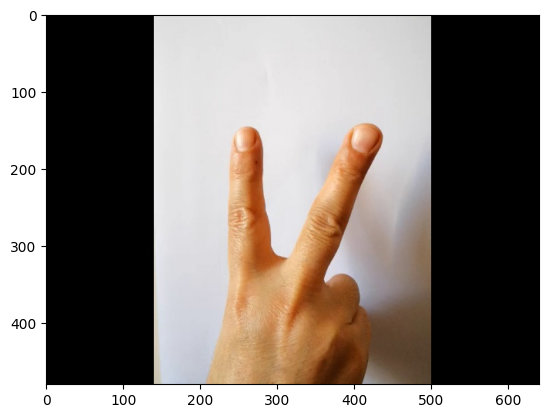

In [24]:
path = os.path.join(FRAMES_DIR, '5', '0.jpg')
img = cv2.imread(path)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [25]:
def remove_borders(img_path):
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnt = contours[-1]
  x, y, w, h = cv2.boundingRect(cnt)
  crop = img[y:y+h, x:x+w]
  cv2.imwrite(img_path, crop)

In [26]:
copy(os.path.join(FRAMES_DIR, '5', '0.jpg'), HOME)

In [27]:
for folder in sorted(os.listdir(FRAMES_DIR)):
  finger_path = os.path.join(FRAMES_DIR, folder)
  for file in sorted(os.listdir(finger_path)):
    remove_borders(os.path.join(finger_path, file))

(480, 640, 3)
(480, 362, 3)


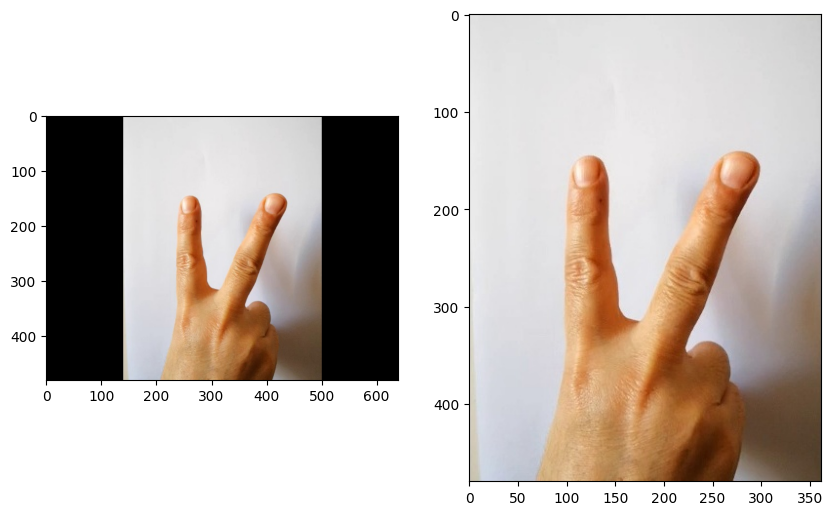

In [28]:
img1 = cv2.cvtColor(cv2.imread(os.path.join(HOME, '0.jpg')), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(os.path.join(FRAMES_DIR, '5', '1.jpg')), cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(img1)
print(img1.shape)
fig.add_subplot(1, 2, 2)
plt.imshow(img2)
print(img2.shape)
plt.show()

In [ ]:
for partition in ['train', 'test']:
  path = os.path.join(DIR_FINGERS, partition)
  i = 0
  for file in sorted(glob.glob(os.path.join(path, '*'))):
    os.rename(file, os.path.join(path, f"{file.split('.png')[0][-2:-1]}_ds1_{i}.png"))
    i += 1

In [37]:
lst_file_count = [[(i, count_files(folder)) for i, folder in enumerate(glob.glob(FRAMES_DIR+'*'))][i][1] for i in range(5)]

for n, folder in enumerate(sorted(glob.glob(os.path.join(FRAMES_DIR, '*')))):
  print(n)
  i = 0
  for file in sorted(glob.glob(os.path.join(folder, '*'))):
    if i < lst_file_count[n] * (1 - TEST_RATIO):
      shutil.copy(file, os.path.join(DIR_FINGERS, 'train', f"{n+1}_ds2_{i}.jpg"))
    else:
      shutil.copy(file, os.path.join(DIR_FINGERS, 'test', f"{n+1}_ds2_{i}.jpg"))
    i += 1

0
1
2
3
4
5


IndexError: list index out of range

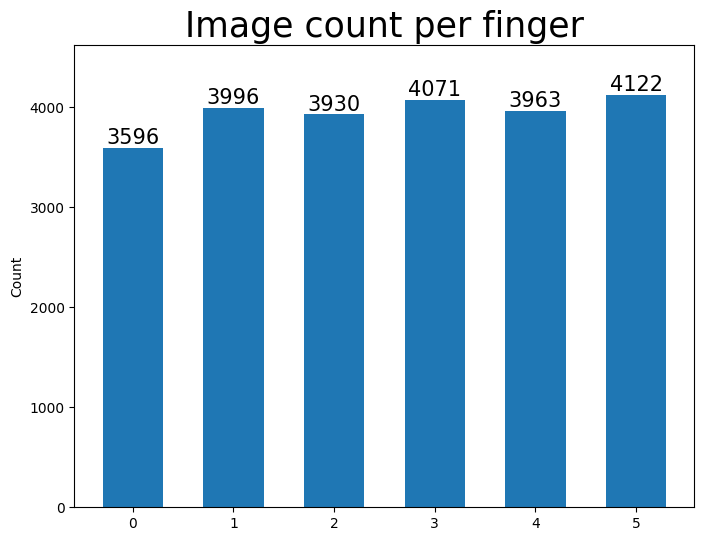

19664 train + 4014 test = Total of 23678 images


In [42]:
counts = [0, 0, 0, 0, 0, 0]
totals = []
for partition in ['train', 'test']:
  total = 0
  for file in glob.glob(os.path.join(DIR_FINGERS, partition, '*')):
    # print(int(file.split(os.path.sep)[-1][0]))
    if(file.split(os.path.sep)[-1][0])!='_':
      counts[int(file.split(os.path.sep)[-1][0])] += 1
      total += 1
  totals.append(total)

plt.figure(figsize=(8, 6))
bar = plt.bar([0, 1, 2, 3, 4, 5], height=counts, data=counts, align='center', width=0.6)
plt.ylim(0, max(counts)+500)
plt.ylabel('Count')
plt.title('Image count per finger', fontsize=25)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=15)

plt.show()
print(f'{totals[0]} train + {totals[1]} test = Total of {sum(totals)} images')

In [43]:
def resize(folder):
  for partition in ['train', 'test']:
    for file in glob.glob(os.path.join(folder, partition, '*')):
      img = cv2.imread(file)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      gray = cv2.resize(gray, TARGET_SIZE)
      cv2.imwrite(file, gray)

In [44]:
resize(DIR_FINGERS)

In [45]:
shapes = {}
i = 0

for partition in ['train', 'test']:
  for file in glob.glob(os.path.join(DIR_FINGERS, partition, '*')):
    img = cv2.imread(file, 0)
    shape = img.shape
    if shape not in shapes.values():
      i += 1
      shapes.update({i: shape})
print(shapes)
if len(shapes) == 1:
  print(f"All images' shapes are equal to {img.shape}.")
else:
  raise ValueError('Something went wrong. Check the dimensions.')

{1: (128, 128)}
All images' shapes are equal to (128, 128).


In [48]:
from tensorflow.keras.utils import  array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [61]:
def prepare_dataset(folder):
  data = []
  labels = []

  for partition in os.listdir(folder):
    for file in sorted(glob.glob(os.path.join(folder, partition, '*'))):
      img = cv2.imread(file, 0)
      img = img_to_array(img)
      data.append(img)
      if file.split(os.path.sep)[-1][0]!="_":
        label = int(file.split(os.path.sep)[-1][0])
        labels.append(label)
  return data, labels

In [62]:
data, labels = prepare_dataset(DIR_FINGERS)

In [59]:
def normalize(data, labels):
  data = np.array(data, dtype="float") / 255.0
  labels = np.array(labels)
  return data, labels

In [63]:
data, labels = normalize(data, labels)

In [67]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data,
	labels, test_size=0.2, random_state=131)

ValueError: Found input variables with inconsistent numbers of samples: [23680, 23678]

In [56]:
del data
del labels

In [57]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

NameError: name 'Y_train' is not defined